# BSG - Metodos no Supervisados

# KMEAN

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [5]:
df = pd.read_excel('Data_CHURN.xlsx', sheet_name = "Data")

In [6]:
df.shape

(9999, 208)

In [7]:
features = list(df.columns.drop(['NUMPERIODO','VCHRUCCOMPANIA','FLG_DEAC_M2','CTD_DEACS_M2',
                                    'INGRESO_DEACS_M2']))

In [8]:
features

['VCHREGION',
 'VCHDISTRITO',
 'VCHSCORECREDITICIO',
 'ANT_CLI',
 'ANT_ACTIVA',
 'DIA_VENTA',
 'NUMUNIDSPRE',
 'NUMUNIDS2TERMINAL',
 'NUMUNIDSPOSTSIN2T',
 'NUMIDENSIN2T',
 'NUMBAM',
 'NUMM2M',
 'NUM3GPTTSIN2T',
 'NUM3G',
 'NUMBAFI',
 'NUMLECTURAORIGINALCLARO',
 'NUMLECTURAORIGINALMOVISTAR',
 'CTD_PROD_ENTEL',
 'CTD_PROD_MERC',
 'PENET_ENTEL',
 'PENET_CLARO',
 'PENET_MOVISTAR',
 'VEP',
 'PENALIDAD',
 'MIN_NUMRENTABASICA',
 'MAX_NUMRENTABASICA',
 'AVG_NUMRENTABASICA',
 'SUM_NUMRENTABASICA',
 'MIN_NUMINGRESOTEORICO',
 'MAX_NUMINGRESOTEORICO',
 'AVG_NUMINGRESOTEORICO',
 'SUM_NUMINGRESOTEORICO',
 'PEN_VEP',
 'NUMMINUTOSENTRANTE_7M',
 'NUMMINUTOSALIENTE_7M',
 'NUMMINSALIENTEOFFNET_7M',
 'NUMMINENTRANTEOFFNET_7M',
 'NUMMINSALIENTEONNET_7M',
 'NUMMINENTRANTEONNET_7M',
 'NUMTRAFICOFACEBOOK_7M',
 'NUMTRAFICOWHATSAPP_7M',
 'NUMTRAFICOYOUTUBE_7M',
 'NUMTRAFICOYOUTUBEPAGADO_7M',
 'NUMTRAFICOSPOTIFY_7M',
 'NUMTRAFICOSOUNDCLOUD_7M',
 'NUMTRAFICOAPPLEMUSIC_7M',
 'NUMTRAFICOINSTAGRAM_7M',
 'NUMTRAFICOM

In [9]:
#características numéricas
features_num = list(df[features].select_dtypes(include=[float, int, np.int64, np.float64]).columns)
features_num

['ANT_CLI',
 'ANT_ACTIVA',
 'DIA_VENTA',
 'NUMUNIDSPRE',
 'NUMUNIDS2TERMINAL',
 'NUMUNIDSPOSTSIN2T',
 'NUMIDENSIN2T',
 'NUMBAM',
 'NUMM2M',
 'NUM3GPTTSIN2T',
 'NUM3G',
 'NUMBAFI',
 'NUMLECTURAORIGINALCLARO',
 'NUMLECTURAORIGINALMOVISTAR',
 'CTD_PROD_ENTEL',
 'CTD_PROD_MERC',
 'PENET_ENTEL',
 'PENET_CLARO',
 'PENET_MOVISTAR',
 'VEP',
 'PENALIDAD',
 'MIN_NUMRENTABASICA',
 'MAX_NUMRENTABASICA',
 'AVG_NUMRENTABASICA',
 'SUM_NUMRENTABASICA',
 'MIN_NUMINGRESOTEORICO',
 'MAX_NUMINGRESOTEORICO',
 'AVG_NUMINGRESOTEORICO',
 'SUM_NUMINGRESOTEORICO',
 'PEN_VEP',
 'NUMMINUTOSENTRANTE_7M',
 'NUMMINUTOSALIENTE_7M',
 'NUMMINSALIENTEOFFNET_7M',
 'NUMMINENTRANTEOFFNET_7M',
 'NUMMINSALIENTEONNET_7M',
 'NUMMINENTRANTEONNET_7M',
 'NUMTRAFICOFACEBOOK_7M',
 'NUMTRAFICOWHATSAPP_7M',
 'NUMTRAFICOYOUTUBE_7M',
 'NUMTRAFICOYOUTUBEPAGADO_7M',
 'NUMTRAFICOSPOTIFY_7M',
 'NUMTRAFICOSOUNDCLOUD_7M',
 'NUMTRAFICOAPPLEMUSIC_7M',
 'NUMTRAFICOINSTAGRAM_7M',
 'NUMTRAFICOMAILILIMITADO_7M',
 'NUMTRAFICONETFLIX_7M',
 'NUMTRAFI

In [10]:
df[features_num]

,ANT_CLI,ANT_ACTIVA,DIA_VENTA,NUMUNIDSPRE,NUMUNIDS2TERMINAL,NUMUNIDSPOSTSIN2T,NUMIDENSIN2T,NUMBAM,NUMM2M,NUM3GPTTSIN2T,...,NUMTRAFICOPAGADO_U6M,NUMTRAFICOTOTAL_U6M,U_NUMMINUTOSENTRANTE_U3M,U_NUMMINUTOSALIENTE_U3M,U_NUMMINSALIENTEOFFNET_U3M,U_NUMMINENTRANTEOFFNET_U3M,U_NUMMINSALIENTEONNET_U3M,U_NUMMINENTRANTEONNET_U3M,U_NUMTRAFICOFACEBOOK_U3M,U_NUMTRAFICOWHATSAPP_U3M
0,26.2258,26.1613,27,0,0,3,0,0,0,0,...,7.823285e+04,8.951108e+04,117.650000,89.238235,84.489376,84.322517,12.812584,33.327482,1.712867,272.137208
1,166.5806,3.1613,27,1,0,12,0,0,0,0,...,8.304683e+05,9.502014e+05,629.885294,730.229412,356.509812,223.880500,373.719600,406.004794,194.930192,2151.306892
2,176.0645,1.5484,31,0,0,39,0,0,0,0,...,3.905743e+05,4.522820e+05,1430.050984,2100.218669,1192.424924,671.688476,907.793746,758.755689,225.046418,1031.065128
3,8.0645,7.3871,20,0,0,34,0,1,0,0,...,4.753973e+05,5.868723e+05,1002.811765,1454.029412,818.119682,466.384294,635.934243,538.113733,102.746829,898.947768
4,28.1935,22.0323,31,0,0,18,0,0,0,0,...,2.018459e+05,2.850869e+05,1423.443691,1751.274478,1003.035470,707.146106,748.239125,716.510362,92.362968,1155.809031
5,66.9032,30.6129,13,1,0,19,0,0,0,0,...,1.068591e+06,1.083034e+06,408.685780,403.783329,256.559759,230.205971,147.425535,179.422933,14.795630,365.309664
6,143.4516,1.1613,27,0,0,23,0,0,0,0,...,2.067414e+05,2.920833e+05,941.291026,954.700000,549.506761,499.612954,405.193367,442.199610,583.916154,4348.807125
7,106.9355,38.2903,23,0,0,26,0,4,0,0,...,1.457478e+05,1.616911e+05,442.387257,588.520591,438.314682,292.945206,151.067661,150.135285,61.286141,303.117686
8,21.1290,2.3548,29,0,0,11,0,0,0,0,...,7.767465e+04,1.246999e+05,599.717647,734.508823,377.708100,320.389300,356.800723,279.328347,38.801445,1834.009252
9,120.0645,2.2581,24,0,0,19,0,3,0,0,...,2.014924e+05,2.256447e+05,551.252075,812.054161,601.934717,364.587558,210.266669,190.397842,130.945176,1172.303488


In [11]:
# vacios
nulos = pd.DataFrame(df[features_num].isnull().sum(), columns = ['cantidad'])
nulos.head()

,cantidad
ANT_CLI,0
ANT_ACTIVA,0
DIA_VENTA,0
NUMUNIDSPRE,0
NUMUNIDS2TERMINAL,0


In [12]:
# reemplazar por cero los NAs
features_na = (nulos[nulos['cantidad']>0].sort_values('cantidad',ascending=False)/df.shape[0]*100).index.values
features_na

array(['PENALIDAD', 'MIN_NUMINGRESOTEORICO', 'MAX_NUMINGRESOTEORICO',
       'AVG_NUMINGRESOTEORICO', 'SUM_NUMINGRESOTEORICO',
       'NUMTRAFICOYOUTUBEPAGADO_U6M', 'NUMTRAFICOYOUTUBEPAGADO_U3M'],
      dtype=object)

In [13]:
nulos_num = list(df[features_na].select_dtypes(include=[int,float,np.int64,np.float64]).columns)
nulos_num

['PENALIDAD',
 'MIN_NUMINGRESOTEORICO',
 'MAX_NUMINGRESOTEORICO',
 'AVG_NUMINGRESOTEORICO',
 'SUM_NUMINGRESOTEORICO',
 'NUMTRAFICOYOUTUBEPAGADO_U6M',
 'NUMTRAFICOYOUTUBEPAGADO_U3M']

In [14]:
df[nulos_num] = df[nulos_num].fillna(0)

In [15]:
df_scala = StandardScaler().fit_transform(df[features_num])

In [16]:
df_scala

array([[-0.79363315,  0.76136512,  0.56053013, ..., -0.94803055,
        -0.53839985, -0.62774977],
       [ 0.85391293, -0.83985643,  0.56053013, ..., -0.08147576,
         0.28457147,  0.76580542],
       [ 0.9652391 , -0.95214383,  1.04994165, ...,  0.73874583,
         0.41284563, -0.06494378],
       ...,
       [-0.76447604,  0.93653179, -1.39711596, ..., -0.9281502 ,
        -0.5304306 , -0.70550886],
       [ 0.83649543, -0.42214646,  0.56053013, ..., -0.86314756,
         0.6649314 , -0.15979916],
       [ 1.28293404,  1.55635769, -1.03005732, ..., -0.80936821,
        -0.52274297, -0.65961374]])

Text(0.5, 1.0, 'Incorrecto NUMERO DE CLUSTERS')

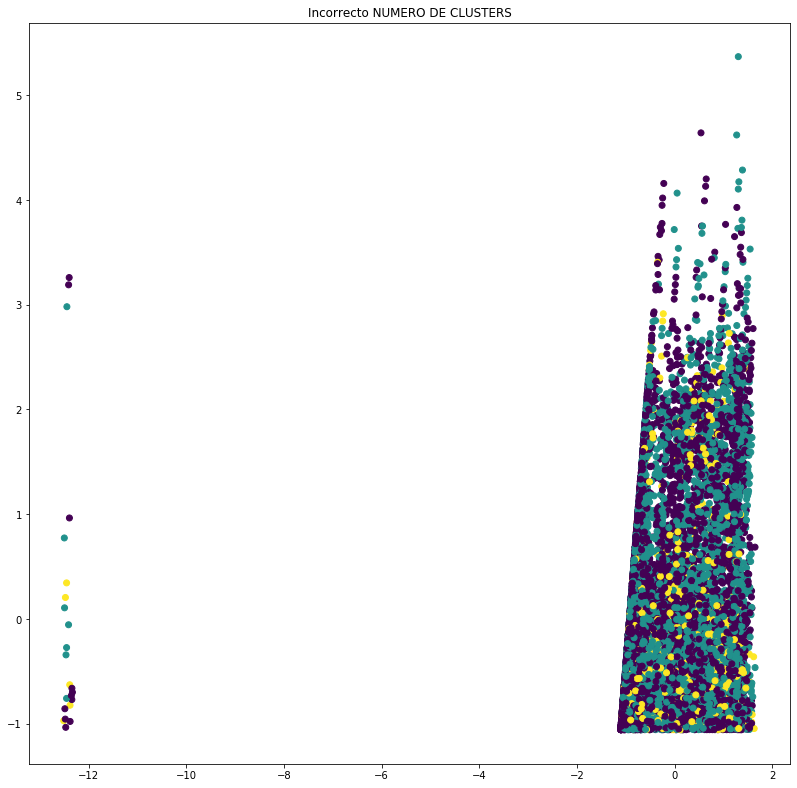

In [17]:
y_pred = KMeans(n_clusters = 3, random_state=170).fit_predict(df_scala)

plt.figure(figsize=(30, 30))
plt.subplot(221)
plt.scatter(df_scala[:, 0], df_scala[:, 1], c=y_pred)
plt.title("Incorrecto NUMERO DE CLUSTERS")


# JERARQUICO

In [27]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [28]:
clustering = AgglomerativeClustering().fit(df_scala)
clustering 
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, 
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [29]:
clustering.labels_

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

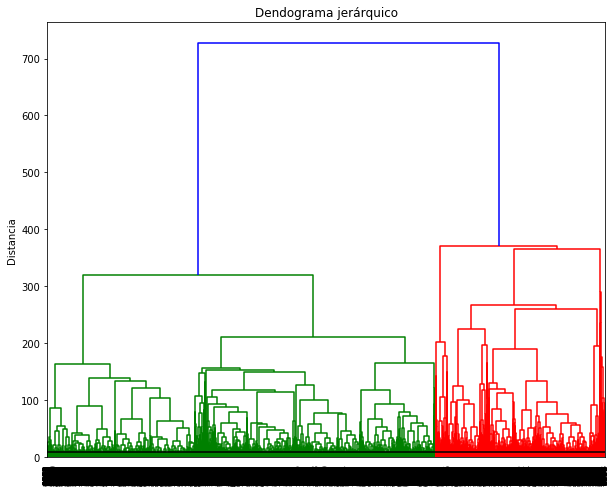

In [30]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

Z = linkage(df_scala, 'ward')

plt.figure(figsize=(10, 8))
plt.title('Dendograma jerárquico')
plt.ylabel('Distancia')
max_d = 10
dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,  
        show_contracted=True
    )
plt.axhline(y=max_d, c='k')
plt.show()